<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/topics/ml%20algos/_01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 1: Create a dummy dataset
# We create a dataset where the target variable has a clear linear relationship with the feature.
np.random.seed(42)  # Setting seed for reproducibility
X = 2 * np.random.rand(100, 1)  # 100 random points as feature values
y = 4 + 3 * X + np.random.randn(100, 1)  # Target variable with a linear relation and some noise

In [ ]:
# Converting the data into a DataFrame for easy manipulation and visualization
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

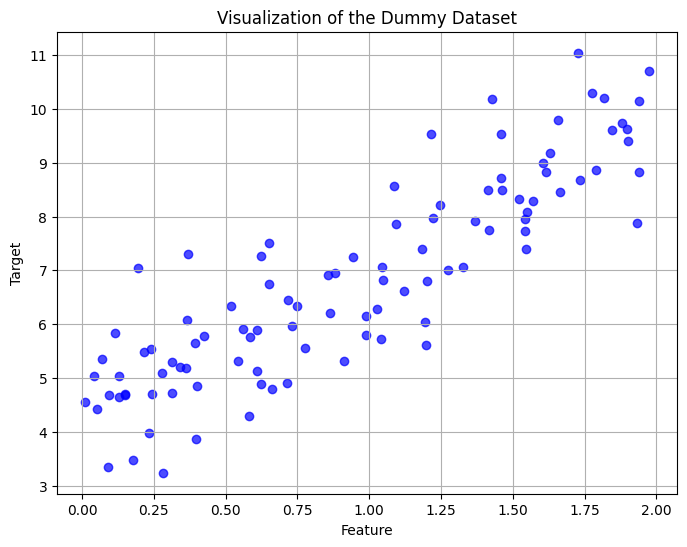

In [ ]:
# Step 2: Visualize the dataset
# Plotting the data to visualize the linear relationship between Feature and Target
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature'], data['Target'], color='blue', alpha=0.7)
plt.title('Visualization of the Dummy Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()

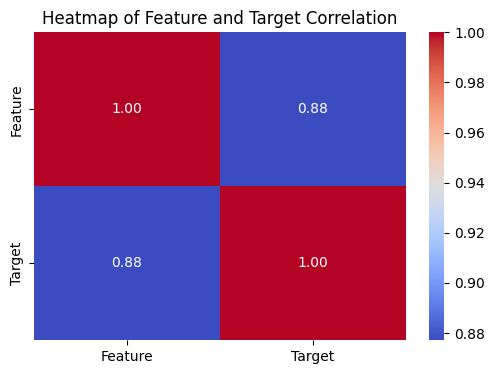

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature and Target Correlation')
plt.show()

In [ ]:
# Step 3: Split the dataset
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Train the Linear Regression model
# Initializing the Linear Regression model and fitting it to the training data
model = LinearRegression()
model.fit(X_train, y_train)  # Training the model

LinearRegression()

In [ ]:
# Step 5: Evaluate the model
# Predicting the target values for the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculating evaluation metrics: Mean Squared Error (MSE) and R-squared (R²) score
mse = mean_squared_error(y_test, y_pred)  # Measures the average squared difference between actual and predicted values
r2 = r2_score(y_test, y_pred)  # Measures how well the model explains the variance in the target variable

In [ ]:
# Printing the evaluation results
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²) Score: {r2:.3f}")

Mean Squared Error (MSE): 0.654
R-squared (R²) Score: 0.807


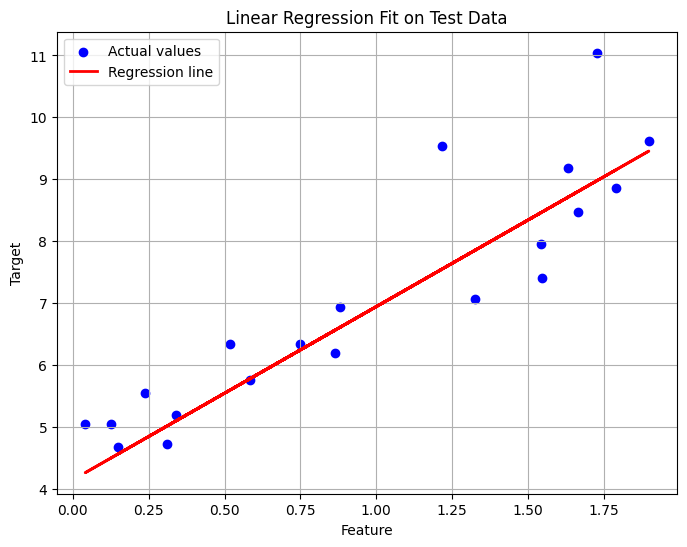

In [ ]:
# Visualizing the Linear Regression line along with the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Fit on Test Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

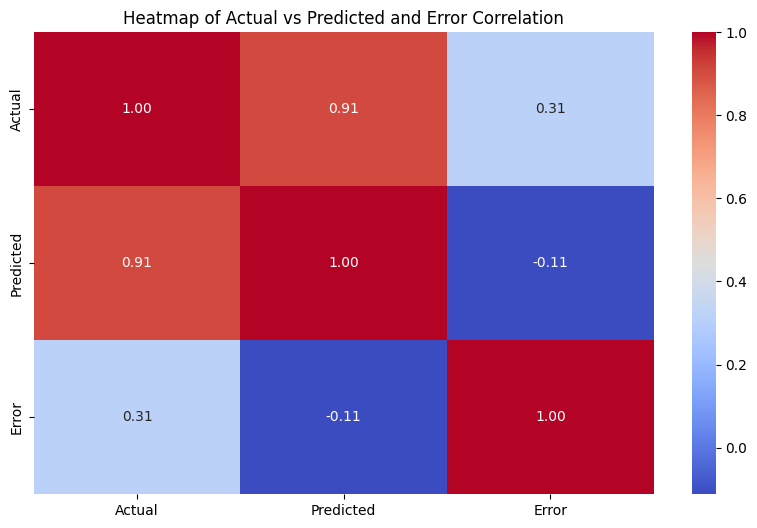

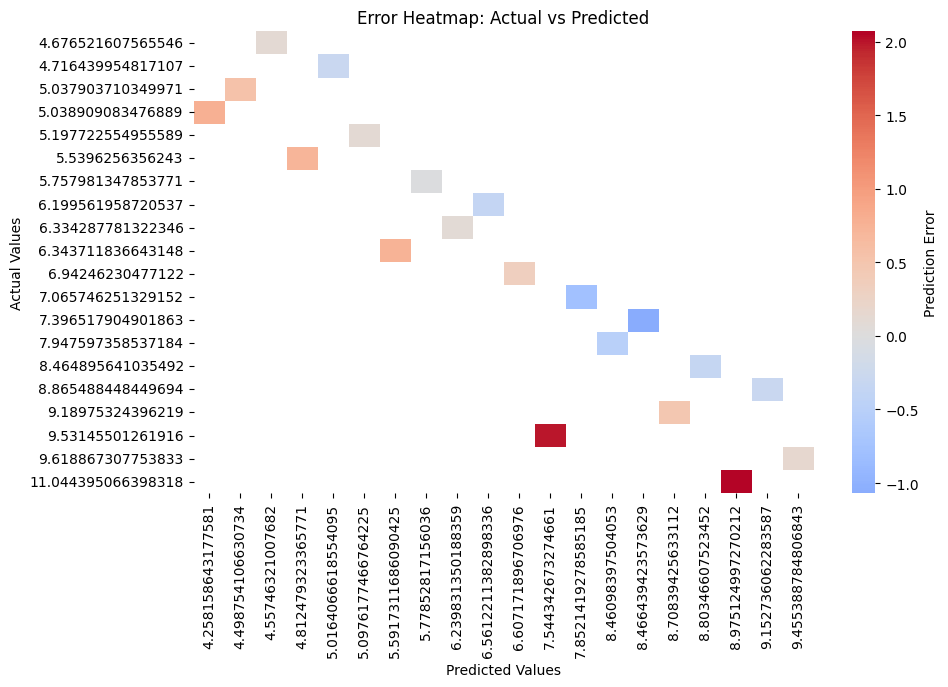

In [ ]:
eval_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
eval_df['Error'] = eval_df['Actual'] - eval_df['Predicted']

# Plotting the heatmap to visualize errors
plt.figure(figsize=(10, 6))
sns.heatmap(eval_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Actual vs Predicted and Error Correlation')
plt.show()

# Step 7: Visualizing errors using a heatmap-like plot for detailed analysis
plt.figure(figsize=(10, 6))
sns.heatmap(eval_df.pivot_table(values='Error', index='Actual', columns='Predicted', aggfunc='mean'),
            cmap='coolwarm', center=0, cbar_kws={'label': 'Prediction Error'})
plt.title('Error Heatmap: Actual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()